1 задачка : Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [3]:
import numpy as np
a=np.random.random((10,3))
print(a)
for i in range(10):
    print(a[i,np.argmin(np.abs(a-0.5),axis=1)[i]])

[[0.1420128  0.01886613 0.01395607]
 [0.44412569 0.16419169 0.18474082]
 [0.27469989 0.42954365 0.69497656]
 [0.19982204 0.73312594 0.53898166]
 [0.68835333 0.67035378 0.48296323]
 [0.04009139 0.88392624 0.29104433]
 [0.48637556 0.2091952  0.44367494]
 [0.72542231 0.76152646 0.49254866]
 [0.27352474 0.71901147 0.27462421]
 [0.86218526 0.62799085 0.01275074]]
0.14201280039295605
0.44412568632971916
0.42954364942626866
0.5389816634165853
0.48296322927452595
0.2910443309611649
0.48637556071684895
0.4925486551868905
0.7190114687217178
0.627990850460328


2 задачка : Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [28]:
a=np.random.random((6,6))
print(a)
print(np.sum(a,axis=1)/np.min(a,axis=0))

[[0.48059778 0.2668364  0.16999416 0.39898226 0.90348941 0.93852317]
 [0.96213206 0.19049932 0.25681621 0.15419415 0.09272732 0.69733051]
 [0.27728576 0.45254627 0.77760686 0.66627237 0.47935701 0.98872137]
 [0.88022727 0.07937852 0.93555529 0.20906174 0.82098803 0.93032968]
 [0.46037487 0.78733685 0.41092088 0.59217313 0.51699149 0.29375578]
 [0.77919881 0.72373038 0.89660521 0.02574715 0.48128802 0.98025786]]
[ 11.39049893  29.6515935   21.42302767 149.74630543  33.01673106
  13.23149252]


3 задачка : На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [36]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.roll(x,1)
mask= x-np.roll(x,1)==x
np.max(x*mask)

6

4 задачка : Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [44]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in i :
    x[j]+=1
print(x)
x.shape[0]

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


10

5 : Написать функцию, реализующую алгоритм k-means.

In [90]:
from random import randrange
from numpy import linalg 
def fun1(obs,k,thresh):
    d=thresh*2
    #obs=np.asarray(a,dtype=np.float32)
    copy=obs
    #c=obs[np.random.choice(obs.shape[0],size=k,replace=False),:]
    c=np.zeros((k,obs.shape[1]),dtype=np.float32)
    for i in range(k) :
        r = randrange(0,len(copy)-1)
        c[i]=copy[r]
        copy=np.delete(copy,r,axis=0)
    obs1=np.broadcast_to(obs,(k,obs.shape[0],obs.shape[1]))
    while(d>thresh):
        c1=np.broadcast_to(c,(obs.shape[0],k,obs.shape[1]))
        c1=c1.swapaxes(1,0)
        b1=linalg.norm(obs1-c1,axis=2)
        b=np.min(linalg.norm(obs1-c1,axis=2),axis=0)
        b=np.broadcast_to(b,(k,obs.shape[0],))
        mask1= b1==b
        mask=np.broadcast_to(mask1,(obs.shape[1],k,obs.shape[0],))
        mask=mask.swapaxes(0,1)
        mask=mask.swapaxes(1,2)
        g=mask*obs1
        g1=mask*(obs1-c1)
        cnew=np.sum(g,axis=1)/np.sum(mask,axis=1)
        d=np.max(linalg.norm(cnew-c,ord=0,axis=1))
        c=cnew
    disp=np.max((np.sum(linalg.norm(g1,axis=2)**2,axis=1))**0.5)
    return cnew, disp
#a=np.array([[0,0],[0,2],[3,0],[3,2]])
#fun1(a,2,10**(-3))

6 задачка

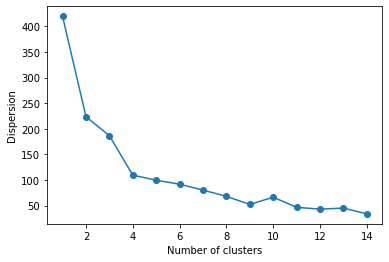

In [48]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
import matplotlib.pyplot as plt
age_income = data[:,[2,3]]
l = []
n = 15
for k in range(1, n):
  ans = fun1(age_income, k, 10**-5)
  l.append(ans[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, n), l, '-o')
plt.show()

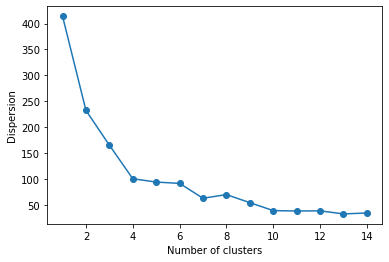

In [57]:
age_score = data[:,[2,4]]
l = []
n = 15
for k in range(1, n):
  ans = fun1(age_score, k, 10**-5)
  l.append(ans[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, n), l, '-o')
plt.show()

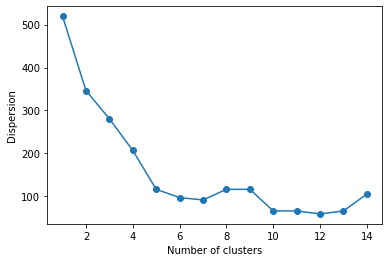

In [61]:
income_score = data[:,[3,4]]
l = []
n = 15
for k in range(1, n):
  ans = fun1(income_score, k, 10**-5)
  l.append(ans[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, n), l, '-o')
plt.show()

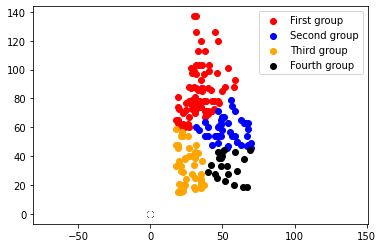

In [92]:
obs=age_income
l=np.zeros((4,obs.shape[0],obs.shape[1]))
obs1=np.broadcast_to(obs,(4,obs.shape[0],obs.shape[1]))
ans = fun1(age_income, 4, 10**-5)
ans1=np.broadcast_to(ans[0],(obs.shape[0],4,obs.shape[1]))
ans1=ans1.swapaxes(1,0)
b=np.argmin(linalg.norm(obs1-ans1,axis=2),axis=0)
a=np.zeros(4,dtype=np.int16)
for i in range(len(b)):
    l[b[i],a[b[i]]]=obs[i]
    a[b[i]]+=1
ax = plt.subplots()
plt.scatter(*l[0].T, c='r', label='First group')
plt.scatter(*l[1].T, c='blue', label='Second group')
plt.scatter(*l[2].T, c='orange', label='Third group')
plt.scatter(*l[3].T, c='black', label='Fourth group')
plt.scatter(0,0,c='w')
plt.axis('equal')
plt.legend()
plt.show()

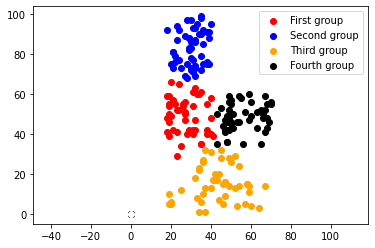

In [93]:
obs=age_score
l=np.zeros((4,obs.shape[0],obs.shape[1]))
obs1=np.broadcast_to(obs,(4,obs.shape[0],obs.shape[1]))
ans = fun1(age_score, 4, 10**-5)
ans1=np.broadcast_to(ans[0],(obs.shape[0],4,obs.shape[1]))
ans1=ans1.swapaxes(1,0)
b=np.argmin(linalg.norm(obs1-ans1,axis=2),axis=0)
a=np.zeros(4,dtype=np.int16)
for i in range(len(b)):
    l[b[i],a[b[i]]]=obs[i]
    a[b[i]]+=1
plt.scatter(*l[0].T, c='r', label='First group')
plt.scatter(*l[1].T, c='blue', label='Second group')
plt.scatter(*l[2].T, c='orange', label='Third group')
plt.scatter(*l[3].T, c='black', label='Fourth group')
plt.scatter(0,0,c='w')
plt.axis('equal')
plt.legend()
plt.show()

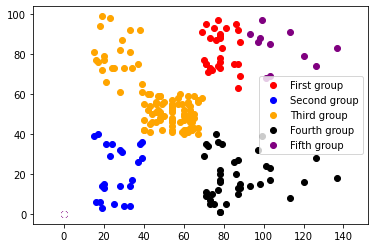

In [94]:
obs=income_score
l=np.zeros((5,obs.shape[0],obs.shape[1]))
obs1=np.broadcast_to(obs,(5,obs.shape[0],obs.shape[1]))
ans = fun1(income_score, 5, 10**-5)
ans1=np.broadcast_to(ans[0],(obs.shape[0],5,obs.shape[1]))
ans1=ans1.swapaxes(1,0)
b=np.argmin(linalg.norm(obs1-ans1,axis=2),axis=0)
a=np.zeros(5,dtype=np.int16)
for i in range(len(b)):
    l[b[i],a[b[i]]]=obs[i]
    a[b[i]]+=1
plt.scatter(*l[0].T, c='r', label='First group')
plt.scatter(*l[1].T, c='blue', label='Second group')
plt.scatter(*l[2].T, c='orange', label='Third group')
plt.scatter(*l[3].T, c='black', label='Fourth group')
plt.scatter(*l[4].T, c='purple', label='Fifth group')
plt.scatter(0,0,c='w')
plt.axis('equal')
plt.legend()
plt.show()